# Support Vector Machines (SVM) - Classification

Support Vector Machines are the type of supervised learning algorithms used for regression, classification and detecting outliers. SVMs are remarkably one of the powerful models in classical machine learning suited for handling complex and high dimensional datasets.

With SVM supporting different kernels (linear, polynomial, Radial Basis Function(rbf), and sigmoid), SVM can tackle different kinds of datasets, both linear and non linear.

While the maths behind the SVMs are beyond the scope of this notebook, here is the idea behind SVMs:

*The way SVM works can be compared to a street with a boundary line. During SVM training, SMV draws the large margin or decision boundary between classes based on the importance of each training data point. The training data points that are inside the decision boundary are called support vectors and hence the name.*

I am going to use Iris flower dataset.The dataset contain 3 species which are: `Iris Setosa`, `Iris Virginica`, `Iris Versicolor`. These species are what I can refer to categories/classes. The features are sepal length, sepal width, petal length, petal width. All features were measured in centimeters(cm).


There are 50 samples for each specy, so I have 150 samples for all species.

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Data Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Support Vector Classifier](#5)
* [6 - Evaluating Support Vector Classifier](#6)
* [7 - Improving Support Vector Classifier](#7)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

I will get Iris data from `sklearn` datasets. Setting `as_frame` parameter to `True` will return data as a Pandas Dataframe.

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


<a name='3'></a>
## 3 - Exploratory Data Analysis

Before exploring some insight in data, I'm gonna split it into test and train set.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("The size of training data is: {}\nThe size of testing data is: {}".format(len(X_train), len(X_test)))

The size of training data is: 120
The size of testing data is: 30


In [7]:
# Three species
y_train.value_counts()

,count
target,
0,42
2,40
1,38


Plotting the histograms of all 4 features.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

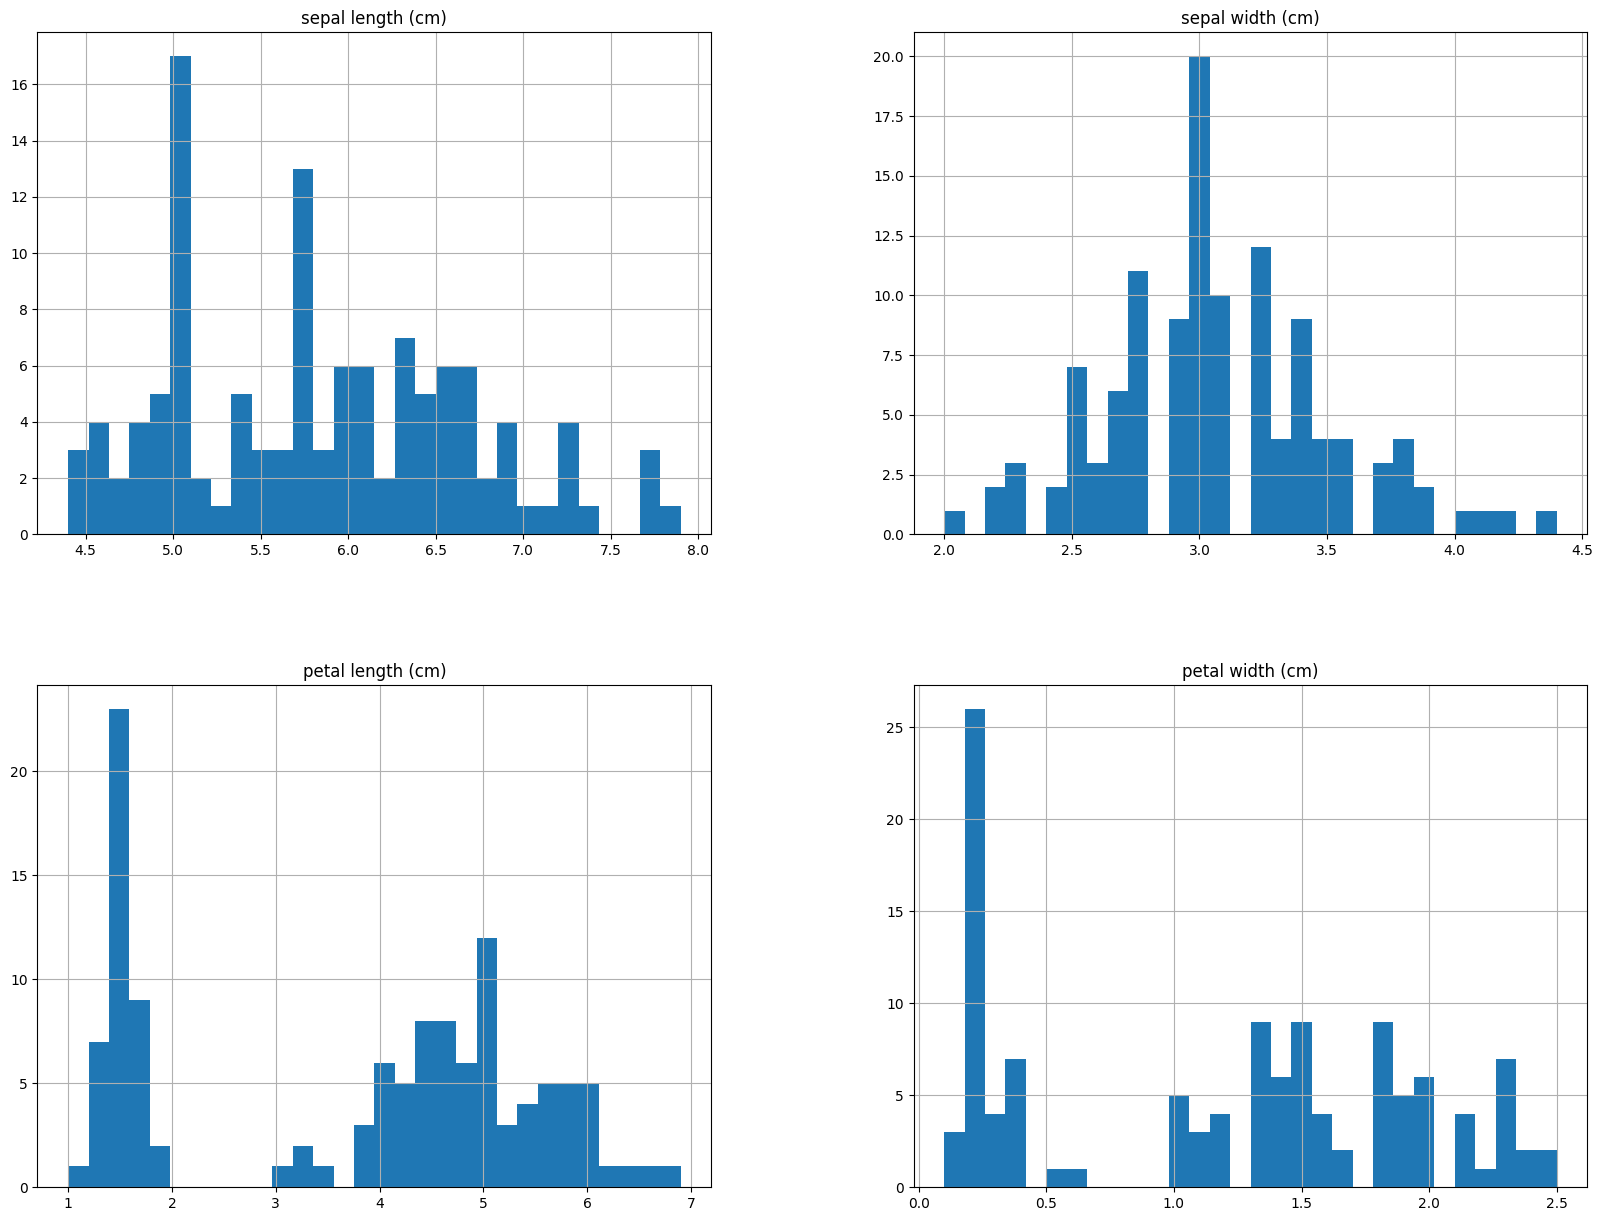

In [8]:
X_train.hist(bins=30, figsize=(20,15))

Plotting the scatter plots of the features.

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

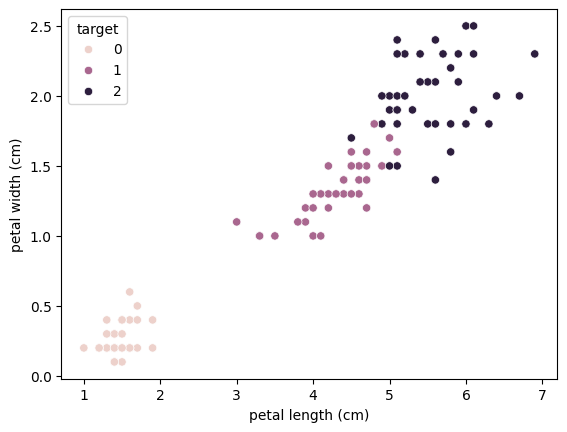

In [9]:
sns.scatterplot(data=X_train, x='petal length (cm)', y='petal width (cm)', hue=y_train)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

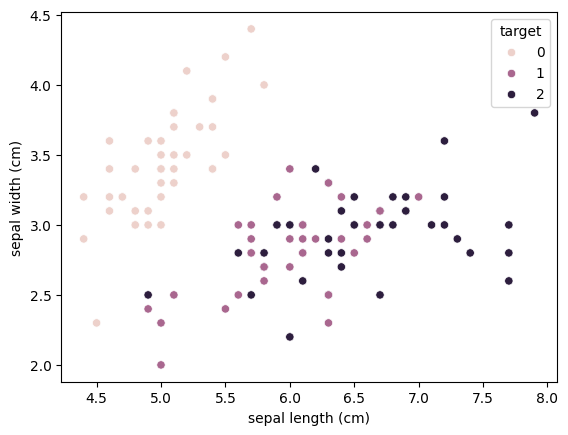

In [10]:
sns.scatterplot(data=X_train, x='sepal length (cm)', y='sepal width (cm)', hue=y_train)

<a name='4'></a>

## 4 - Data Preprocessing

The features already have small values but I'm gonna scale them to be between 0 and 1. SVM work well with scaled values. I will set up a pipeline to handle that.

In [11]:
X_train.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scale_pipe = Pipeline([
    ('scaler', MinMaxScaler()) # 0 to 1
])

X_train_scaled = scale_pipe.fit_transform(X_train)

<a name='5'></a>

## 5 - Training Support Vector Classifier

I'm gonna train two classifiers: Linear SVC and SVC that I can use different kernels. SVM supports `linear`, `polynomial`, `sigmoid` and `rbf` kernels.

In [13]:
from sklearn.svm import LinearSVC, SVC

lin_svc = LinearSVC()
lin_svc.fit(X_train_scaled, y_train)

LinearSVC()

In [14]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train_scaled, y_train)

SVC(kernel='poly')

<a name='6'></a>

## 6 - Evaluating Support Vector Classifier

First checking the accuracy on the training. For this step since I'm trying to find model to improve further, I won't touch test set yet.

In [15]:
from sklearn.metrics import accuracy_score

lin_pred = lin_svc.predict(X_train_scaled)
accuracy_score(y_train, lin_pred)

0.9333333333333333

In [16]:
from sklearn.metrics import accuracy_score

poly_pred = poly_svc.predict(X_train_scaled)
accuracy_score(y_train, poly_pred)

0.975

I'll also display the confusion matrix and the classification report on SVC with polynomial kernel. Classification report goes beyond accuracy to recall, precision, and f1 score.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_train, poly_pred))
print(classification_report(y_train, poly_pred))

[[42  0  0]
 [ 0 35  3]
 [ 0  0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.92      0.96        38
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



The results look pretty good, especially since I didn’t tune any hyperparameters. For this dataset, that’s enough. But in real-world projects, models usually don’t perform well right away. I often need to tune the hyperparameters to improve performance.

There are two common ways to search for the best hyperparameters: Randomized Search and Grid Search. Earlier, I used Randomized Search. Now, I’ll try Grid Search.

<a name='7'></a>

## 7 - Improving Support Vector Classifier

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [23]:
# I define a set of hyperparameters to try during Grid Search
params_grid = {
    'C': [0.001, 10, 100, 1000],       # Controls regularization
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient
    'degree': [2, 3, 4, 5],            # Degree for polynomial kernel
    'coef0': [0, 1, 2, 4]              # Independent term for poly kernel
}

In [24]:
# I set up GridSearchCV to search all combinations of params
# verbose=2 helps me track the progress
grid_search = GridSearchCV(SVC(kernel='poly'), params_grid, verbose=2)

In [25]:
# I fit Grid Search on my training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degre

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 4],
                         'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [26]:
# I check which hyperparameters worked best
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'coef0': 1, 'degree': 2, 'gamma': 1}


In [27]:
# I take the best model found and train it on the full training set
# If refit=True in GridSearchCV, this step is automatic
poly_best = grid_search.best_estimator_.fit(X_train_scaled, y_train)

In [28]:
# I predict on the training data
train_preds = poly_best.predict(X_train_scaled)

# I calculate training accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds))

# I check confusion matrix to see mistakes
print("Confusion Matrix:\n", confusion_matrix(y_train, train_preds))

# I check detailed classification metrics
print("Classification Report:\n", classification_report(y_train, train_preds))

Training Accuracy: 0.975
Confusion Matrix:
 [[42  0  0]
 [ 0 35  3]
 [ 0  0 40]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.92      0.96        38
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [29]:
# I scale test data (I only transform, not fit_transform)
test_scaled = scale_pipe.transform(X_test)

# I predict on test set
test_preds = poly_best.predict(test_scaled)

# I check test accuracy
print("Test Accuracy with tuned model:", accuracy_score(y_test, test_preds))

Test Accuracy with tuned model: 1.0


In [30]:
# I test my first polynomial model without hyperparameter tuning
test_pred_poly = poly_svc.predict(test_scaled)

print("Test Accuracy without tuning:", accuracy_score(y_test, test_pred_poly))
print("Classification Report without tuning:\n", classification_report(y_test, test_pred_poly))

Test Accuracy without tuning: 1.0
Classification Report without tuning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

